In [ ]:
# Let allow this notebook to acces to our Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow as tf

In [4]:
import pytorch as pt

ModuleNotFoundError: ignored

In [ ]:
import os, sys
import pandas as pd
import numpy as np

# set a seed to ensure reproducibility
seed = 42
rnd  = np.random.RandomState(seed)

# Matplotlib plotting settings
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib version: {}'.format(mp.__version__))

FONTSIZE = 16
params = {
         'axes.labelsize': FONTSIZE,
         'axes.titlesize': FONTSIZE,
         'xtick.labelsize':FONTSIZE,
         'ytick.labelsize':FONTSIZE}
plt.rcParams.update(params)

matplotlib version: 3.2.2


In [ ]:
# Now let upload the Data 

path_train_dataset = "../content/gdrive/MyDrive/Colab_Notebook/ATLAS_higgs_train.csv"
path_test_dataset = "../content/gdrive/MyDrive/Colab_Notebook/ATLAS_higgs_test.csv"
path_valid_dataset = "../content/gdrive/MyDrive/Colab_Notebook/ATLAS_higgs_valid.csv"

train = pd.read_csv(path_train_dataset) 
test = pd.read_csv(path_test_dataset) 
valid = pd.read_csv(path_valid_dataset) 

In [ ]:
train.head()

,Z1mass,Z2mass,detajj,massjj,l1pdgid,l1eta,l1phi,l1pt,l2pdgid,l2eta,...,l2pt,l3pdgid,l3eta,l3phi,l3pt,l4pdgid,l4eta,l4phi,l4pt,sample
0,68.515258,57.174385,4.283580,556.406882,-11,0.490221,-2.302279,68.776711,-11,0.910430,...,50.775758,11,-0.495413,-1.409834,28.700672,11,0.542029,-0.328558,17.054512,1
1,84.330551,25.551337,1.101106,266.768190,-11,1.291437,1.917571,77.658719,11,0.142028,...,61.922754,-13,0.208367,1.411837,30.645279,13,1.380638,0.300915,8.034711,-1
2,90.902327,30.404745,2.394863,211.879331,-13,0.702544,-0.946013,91.046750,13,0.958006,...,32.417166,11,0.385190,0.934649,17.942230,-11,0.672241,-1.410558,14.799019,-1
3,91.129112,26.609989,1.040268,56.235126,-11,-2.450392,3.123466,58.988305,11,-1.276226,...,30.001736,-13,-1.275654,0.280533,12.816265,13,-2.283192,-2.326921,11.448904,1
4,87.525977,32.304742,3.674720,351.241850,11,-1.303559,0.963711,66.502133,-11,-0.254885,...,26.519908,-13,-1.052104,0.041387,22.981393,13,0.099710,1.758643,12.038583,1


In [ ]:
train.shape

(35000, 21)

In [ ]:
test.shape

(10000, 21)

In [ ]:
valid.shape

(2500, 21)

In [ ]:
train.groupby?

In [ ]:
train.groupby("sample")['sample'].count()


sample
-1    17500
 1    17500
Name: sample, dtype: int64

In [ ]:
test.groupby("sample")['sample'].count()

sample
-1    5000
 1    5000
Name: sample, dtype: int64

In [ ]:
fon = valid.groupby("sample")['sample'].count()

# 2.1.2. Visualize the Data

In [ ]:
# GLOBAL VARIABLES
XNAME = 'detajj'; XLABEL = r'$|\Delta\eta_{jj}|$'
YNAME = 'massjj'; YLABEL = r'$m_{jj}$ (GeV)'

inputs= [XNAME, YNAME] ;

XBINS = 5 ; XMIN = 0 ; XMAX = 5    ; XSTEP = 1
YBINS = 5 ; YMIN = 0 ; YMAX = 1000 ; YSTEP = 200

# Creating reduced datasets with detajj & massjj only
X_train = train[inputs] ; y_train = train['sample']
X_valid = valid[inputs] ; y_valid = valid['sample']
X_test  =  test[inputs] ; y_test  =  test['sample']

In [ ]:
def plot_scatter(sig, bkg, 
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot"):
  
  fig, ax = plt.subplots(figsize=fgsize)

  # Annotate x-axis
  ax.set_xlim(xmin, xmax)
  ax.set_xlabel(xlabel)
  ax.set_xticks(np.arange(xmin, xmax+xstep, xstep))

  # Annotate y-axis
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel(ylabel)
  ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))

  # Scatter signal and background:
  ax.scatter(sig[xname], sig[yname], marker='o', s=15, c='b', alpha=alpha, label='VBF')
  ax.scatter(bkg[xname], bkg[yname], marker='*', s= 5, c='r', alpha=alpha, label='ggf')

  # Legend and plot:
  ax.legend(fontsize=ftsize, bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False) 
  ax.set_title(title, pad=20)
  plt.show()

In [ ]:
inter_data = pd.DataFrame({'detajj': X_train['detajj'], 'massjj': X_train['massjj'], 'sample': train['sample']},
                 columns = ['detajj', 'massjj', 'sample'])

In [ ]:
inter_data.head()

,detajj,massjj,sample
0,4.283580,556.406882,1
1,1.101106,266.768190,-1
2,2.394863,211.879331,-1
3,1.040268,56.235126,1
4,3.674720,351.241850,1


In [ ]:
sig = inter_data.loc[inter_data['sample'] == 1]
bkg = inter_data.loc[inter_data['sample'] == -1]

In [ ]:
sig.head()

,detajj,massjj,sample
0,4.283580,556.406882,1
3,1.040268,56.235126,1
4,3.674720,351.241850,1
5,0.265865,23.380998,1
6,0.143978,35.743186,1


In [ ]:
bkg.head()

,detajj,massjj,sample
1,1.101106,266.768190,-1
2,2.394863,211.879331,-1
9,0.206298,30.669335,-1
10,0.460602,62.939406,-1
11,2.407556,143.927120,-1


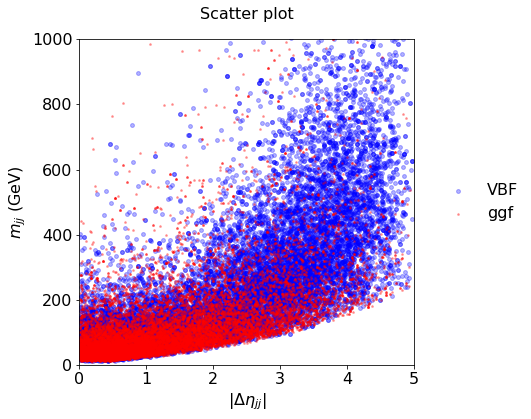

In [ ]:
# Now we can test our function

plot_scatter(sig, bkg, 
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot")

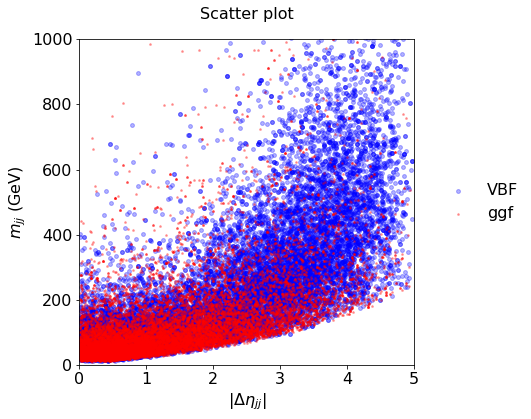

In [ ]:
plot_scatter(train.loc[inter_data['sample'] == 1], train.loc[inter_data['sample'] == -1], 
              xname=XNAME, xlabel=XLABEL, xmin=XMIN, xmax=XMAX, xstep=XSTEP,
              yname=YNAME, ylabel=YLABEL, ymin=YMIN, ymax=YMAX, ystep=YSTEP,
              fgsize=(6, 6), ftsize=FONTSIZE, alpha=0.3, title="Scatter plot")

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

In [ ]:
    from sklearn.tree import DecisionTreeClassifier

    tree_clf = DecisionTreeClassifier(max_depth = 2)
    tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[1] <= 214.233\ngini = 0.5\nsamples = 35000\nvalue = [17500, 17500]'),
 Text(0.25, 0.5, 'X[1] <= 118.289\ngini = 0.483\nsamples = 25246\nvalue = [14949, 10297]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.47\nsamples = 18209\nvalue = [11324, 6885]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 7037\nvalue = [3625, 3412]'),
 Text(0.75, 0.5, 'X[0] <= 2.241\ngini = 0.386\nsamples = 9754\nvalue = [2551, 7203]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 1760\nvalue = [880, 880]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.331\nsamples = 7994\nvalue = [1671, 6323]')]

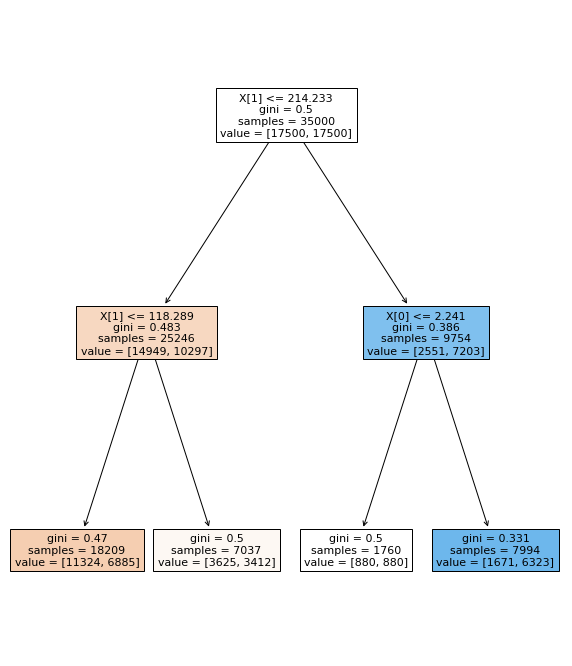

In [ ]:
plt.figure(figsize=(10,12))
tree.plot_tree(tree_clf, filled=True)